In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import read_nml as rnl

from Utils import numerical_utils as nuti


In [2]:
# Replace with your path
case='correctedZeta'
odir = f"../cases/{case}"

nml_path = f"{odir}/atm_in"

nml = rnl.read_namelist(nml_path)
group_name, active = rnl.choose_active_group(nml)

print(f"Active group: {group_name}")
# Access fields robustly
bnd_topo = active.get('bnd_topo')
ncdata = active.get('ncdata')
scale = active.get('scale_dry_air_mass')
use_topo = active.get('use_topo_file')

print("bnd_topo:", bnd_topo)
print("ncdata:", ncdata)
print("scale_dry_air_mass:", scale)
print("use_topo_file:", use_topo)


Active group: cam_initfiles_nl_xy
bnd_topo: /glade/work/juliob/bndtopo/fv1x1_gmted2010_modis_bedmachine_nc3000_Laplace0100_noleak_greenlndantarcsgh30fac2.50_20251009.nc
ncdata: /glade/derecho/scratch/juliob/archive//c153_topfix_ne240pg3_FMTHIST_xic_x02/atm/fv1x1/c153_topfix_ne240pg3_FMTHIST_xic_x02.cam.h1i.2004-07-02-00000.nc
scale_dry_air_mass: 98288.0
use_topo_file: True


In [3]:
print( active )

{'bnd_topo': '/glade/work/juliob/bndtopo/fv1x1_gmted2010_modis_bedmachine_nc3000_Laplace0100_noleak_greenlndantarcsgh30fac2.50_20251009.nc', 'ncdata': '/glade/derecho/scratch/juliob/archive//c153_topfix_ne240pg3_FMTHIST_xic_x02/atm/fv1x1/c153_topfix_ne240pg3_FMTHIST_xic_x02.cam.h1i.2004-07-02-00000.nc', 'scale_dry_air_mass': 98288.0, 'use_topo_file': True, 'ncdata_type': 'XY_DATA'}


In [4]:

# Open the binary file
with open(f"{odir}/GW.dat", 'rb') as f:
    # Read the dimensions (ncol, nlev) - Fortran writes integers in 4 bytes by default
    ncol, nlev = np.fromfile(f, dtype=np.int32, count=2)
    print(f"Dimensions read from file: ncol={ncol}, nlev={nlev}")
    lat = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    lon = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    sgh = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')



    
    # Read array (two dimensions), Fortran order
    zm = np.fromfile(f, dtype=np.float64, count=ncol * nlev).reshape((ncol, nlev), order='F')
    # Read  array (two dimensions), Fortran order
    zi = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')

    uu = np.fromfile(f, dtype=np.float64, count=ncol * nlev).reshape((ncol, nlev), order='F')
    vv = np.fromfile(f, dtype=np.float64, count=ncol * nlev).reshape((ncol, nlev), order='F')

    # read booleans (4 bytes each)
    flags_int = np.fromfile(f, dtype=np.int32, count=2)
    use_gw_rdg_beta , use_gw_movmtn_pbl = flags_int != 0  # convert to booleans

    print( f"Boolean use_gw_rdg_beta and use_gw_movmtn_pbl vars => {use_gw_rdg_beta} {use_gw_movmtn_pbl}" )
    
    tau_a = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')
    tau_b = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')

    bwv = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    tlb = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    wbr = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')

    ubmsrc = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    nsrc = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')

    tauoro = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    taudsw = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    
    ubm = np.fromfile(f, dtype=np.float64, count=ncol * (nlev) ).reshape((ncol, nlev), order='F')
    tau = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')
    tau_diag = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')

    if (use_gw_movmtn_pbl==True):
        ubm_movmtn  = np.fromfile(f, dtype=np.float64, count=ncol * (nlev) ).reshape((ncol, nlev), order='F')
        vort_movmtn = np.fromfile(f, dtype=np.float64, count=ncol * (nlev) ).reshape((ncol, nlev), order='F')
        tau_movmtn  = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')

# 


Dimensions read from file: ncol=55296, nlev=93
Boolean use_gw_rdg_beta and use_gw_movmtn_pbl vars => True True


In [5]:
print( tau.shape )

(55296, 94)


In [6]:

print( ncdata )
print(active['ncdata_type'])


/glade/derecho/scratch/juliob/archive//c153_topfix_ne240pg3_FMTHIST_xic_x02/atm/fv1x1/c153_topfix_ne240pg3_FMTHIST_xic_x02.cam.h1i.2004-07-02-00000.nc
XY_DATA


In [7]:
#
X=xr.open_dataset( ncdata )

In [8]:
if (active['ncdata_type'] == 'XY_DATA' ):
    dims=np.array( X.dims.values )
    nt = X.sizes['time'] 
    nz = X.sizes['lev'] 
    ny = X.sizes['lat'] 
    nx = X.sizes['lon'] 
    print( X.upwp.values.shape )
    lat_xy = lat.reshape( [nx,ny] )
    sgh_xy = sgh.reshape( [ny,nx] )
    # This reshaping seems to work 
    zm_xy = zm.reshape( [ny,nx,nz] )
    uu_xy = uu.reshape( [ny,nx,nz] )
    vv_xy = vv.reshape( [ny,nx,nz] )
    zeta_xy = vort_movmtn.reshape( [ny,nx,nz] )
    

(1, 93, 192, 288)


In [9]:
if (active['ncdata_type'] == 'XY_DATA' ):
    lon1 = X.lon.values
    lat1 = X.lat.values
    upwp=X.upwp.values
    vpwp=X.vpwp.values
    uu_m=X.U.values
    vv_m=X.V.values
    
    mpwp=np.sqrt( upwp**2 + vpwp**2 )

    zeta_m = np.zeros(  (nt,nz,ny,nx) )
    for z in np.arange( nz ):
        zeta_m[0,z,:,:] = nuti. Sphere_Curl2( f_x=uu_m[0,z,:,:], f_y=vv_m[0,z,:,:], lat=lat1, lon=lon1, wrap=True )
        #print( z )


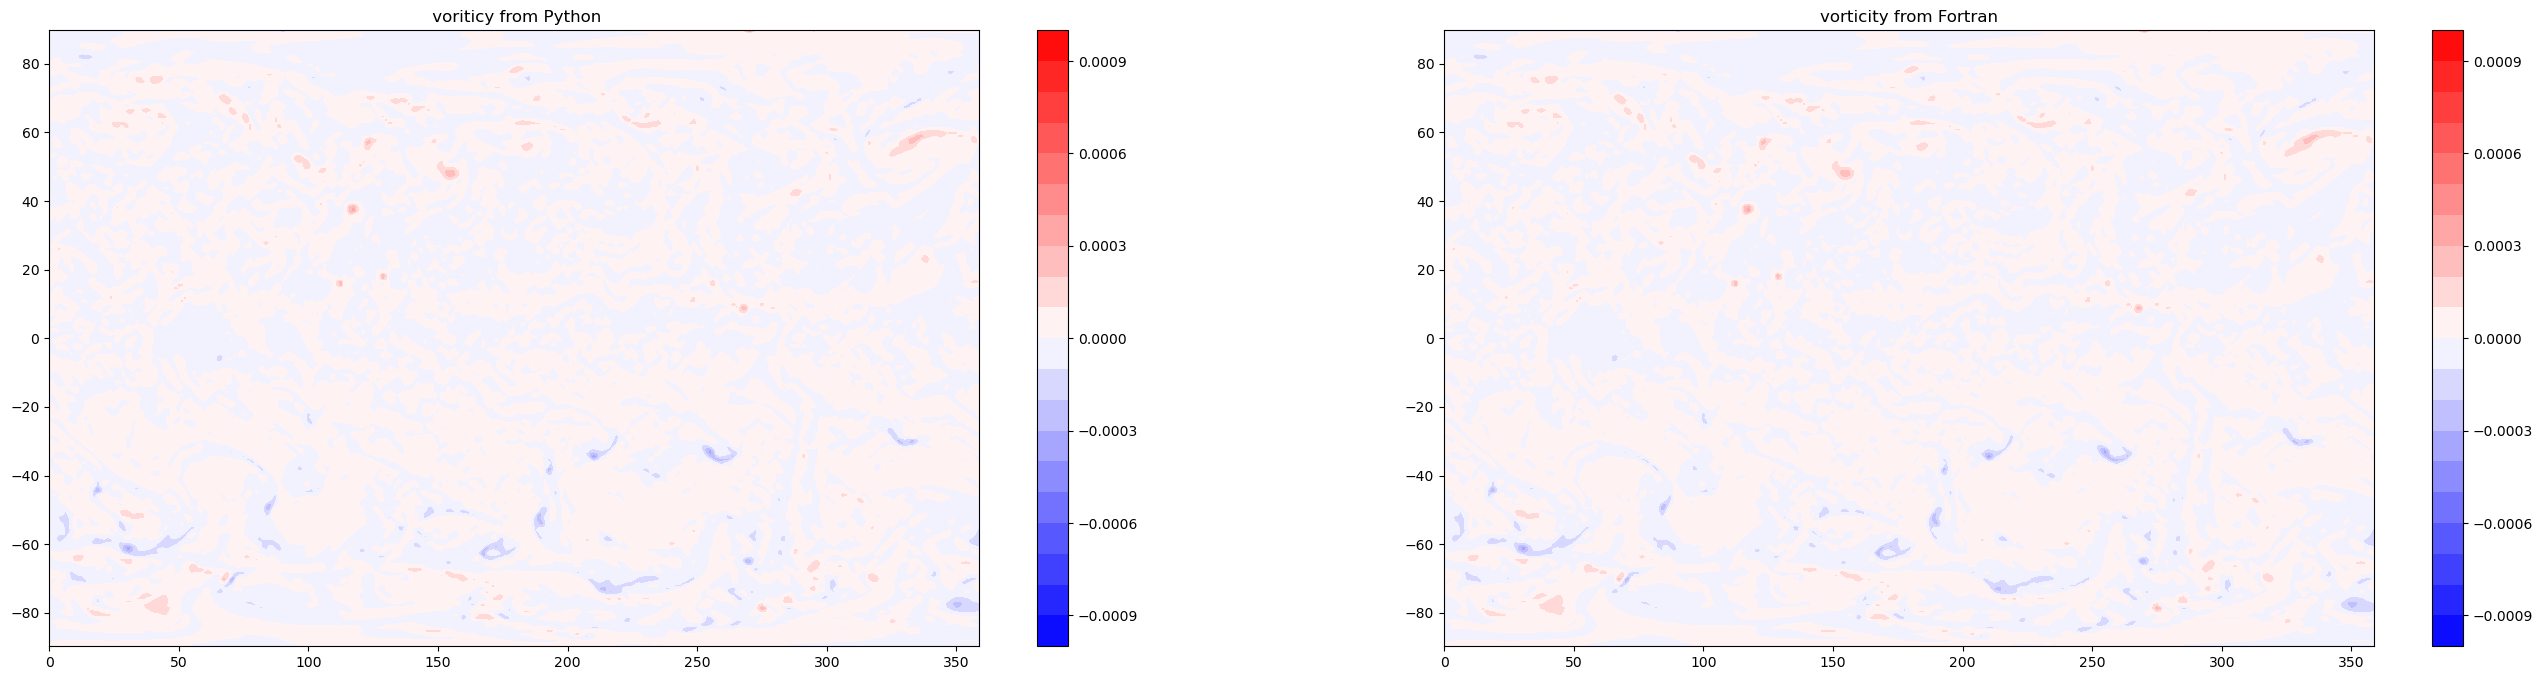

In [10]:
fig,axs=plt.subplots( 1,2, figsize=(33,8) )

t,z=0,80
levels=1e-3 * np.linspace( -1,1,num=21)
cmap='bwr'

ax=axs[0]
c=ax.contourf( lon1, lat1, zeta_m[t,z,:,:] , levels= levels, cmap=cmap ) # vort_movmtn[:,90] )
ax.set_title( ' voriticy from Python' )
plt.colorbar(c)
ax=axs[1]
c=ax.contourf( lon1, lat1, zeta_xy[:,:,z] , levels= levels, cmap=cmap  ) # vort_movmtn[:,90] )
ax.set_title( 'vorticity from Fortran' )
plt.colorbar(c)


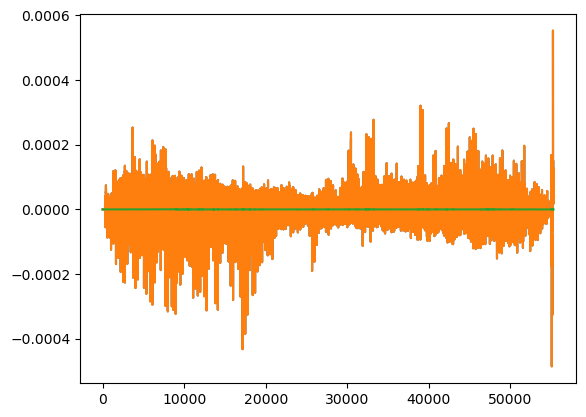

In [12]:
#plt.scatter( zeta_m[t,z,:,:].flatten() , zeta_xy[:,:,z].flatten() )

plt.plot( zeta_m[t,z,:,:].flatten() )
plt.plot( +1.*zeta_xy[:,:,z].flatten() )
plt.plot( zeta_m[t,z,:,:].flatten() - zeta_xy[:,:,z].flatten() )



In [ ]:
zmegw=X.ZMEGW.values
ziegw=X.ZIEGW.values
uegw=X.UEGW.values
vegw=X.VEGW.values



In [ ]:
fig,axs=plt.subplots( 1,4, figsize=(33,8) )

ax=axs[0]
c=ax.tricontourf( lon, lat, sgh ) # vort_movmtn[:,90] )
plt.colorbar(c)

ax=axs[1]
#c=ax.contourf( sgh_xy ) # vort_movmtn[:,90] )
#plt.colorbar(c)

ax=axs[2]
c=ax.tricontourf( lon,lat, uegw[0,92,:],levels=21) # vort_movmtn[:,90] )
plt.colorbar(c)

ax=axs[3]
c=ax.tricontourf( lon,lat, uu[:,92],levels=21 ) # vort_movmtn[:,90] )
plt.colorbar(c)



In [ ]:
fig,axs=plt.subplots( 1,4, figsize=(33,8) )

ax=axs[0]
c=ax.tricontourf( lon, lat, sgh ) # vort_movmtn[:,90] )
plt.colorbar(c)

ax=axs[1]
c=ax.contourf( sgh_xy ) # vort_movmtn[:,90] )
plt.colorbar(c)

ax=axs[2]
c=ax.tricontourf( lon,lat, zm[:,22],levels=21 ) #np.linspace(0,50,num=26) ) # vort_movmtn[:,90] )
plt.colorbar(c)

ax=axs[3]
c=ax.contourf( zm_xy[:,:,22],levels=21 ) #np.linspace(0,50,num=26) ) # vort_movmtn[:,90] )
plt.colorbar(c)



In [ ]:
fig,axs=plt.subplots( 1,4, figsize=(33,8) )

ax=axs[0]
c=ax.tricontourf( lon, lat, sgh ) # vort_movmtn[:,90] )
plt.colorbar(c)

ax=axs[1]
#c=ax.contourf( sgh_xy ) # vort_movmtn[:,90] )
#plt.colorbar(c)

ax=axs[2]
c=ax.tricontourf( lon,lat, zmegw[0,22,:],levels=21 ) #np.linspace(0,50,num=26) ) # vort_movmtn[:,90] )
plt.colorbar(c)

ax=axs[3]
c=ax.tricontourf( lon,lat, zm[:,22],levels=21 ) #np.linspace(0,50,num=26) ) # vort_movmtn[:,90] )
plt.colorbar(c)



In [ ]:
plt.plot(upwp.flatten())

In [ ]:
tau_plot=tau_movmtn # +tau

In [ ]:
llev=0.1*np.linspace(0,5,num=26)


z=40
lev=0.01*np.linspace(0.,2.5,num=51)
fig,axs=plt.subplots(1,2,figsize=(20,5))
ax=axs[0]
co=ax.tricontourf( lon,lat, tau_plot.T[z,:], levels=lev )
plt.colorbar(co)
ax=axs[1]
co=ax.contourf( lon1,lat1, 0.1*mpwp[0,z,:], levels=lev )
plt.colorbar(co)


In [ ]:
lon = X.lon.values
lat = X.lat.values

taudsw_cam = X.TAUDSW1.values
tauoro_cam = X.TAUORO1.values
tau_a_cam = X.TAUM1_DIAG_A.values
tau_b_cam = X.TAUM1_DIAG_B.values
tau_diag_cam = X.TAUM1_DIAG.values
tau_cam=X.TAU1RDGBETAM.values
ubm_cam=X.UBM1BETA.values
zm_cam=X.ZMEGW.values
zi_cam=X.ZIEGW.values
mxdis=X.MXDIS1.values
tau_movmtn_cam = X.TAU_MOVMTN.values


In [ ]:
z=np.arange(start=50,stop=94)
plt.plot( tau_a_cam[0,z,:].flatten() )
plt.plot( tau_a.T[z,:].flatten() )
plt.plot( tau_a_cam[0,z,:].flatten() -  tau_a.T[z,:].flatten() )


In [ ]:
z=np.arange(start=50,stop=94)
plt.plot( tau_diag_cam[0,z,:].flatten() )
plt.plot( tau_diag.T[z,:].flatten() )
plt.plot( tau_diag_cam[0,z,:].flatten() -  tau_diag.T[z,:].flatten() )


In [ ]:
z=np.arange(start=50,stop=94)
plt.plot( tau.T[z,:].flatten() )
plt.plot( tau_cam[0,z,:].flatten() )
plt.plot( tau_cam[0,z,:].flatten() -  tau.T[z,:].flatten() )


In [ ]:
z=20 #np.arange(start=50,stop=94)
plt.scatter( tau_diag_cam[0,z,:].flatten() ,  tau_diag.T[z,:].flatten() )


In [ ]:
z=20
lev=0.1*np.linspace(0.,2.5,num=51)
fig,ax=plt.subplots(1,2,figsize=(20,5))
co=ax[0].tricontourf( lon,lat, tau_diag_cam[0,z,:], levels=lev )
plt.colorbar(co)
co=ax[1].tricontourf( lon,lat, tau_diag.T[z,:], levels=lev )
plt.colorbar(co)


In [ ]:
#plt.plot(ubm_movmtn[10_000,:] )
plt.plot(tau_movmtn[:,70] )

In [ ]:
X

In [ ]:
z=20
lev=0.01*np.linspace(0.,2.5,num=51)
fig,axs=plt.subplots(1,2,figsize=(20,5))
ax=axs[0]
co=ax.tricontourf( lon,lat, tau_movmtn.T[z,:], levels=lev )
plt.colorbar(co)
ax=axs[1]
co=ax.tricontourf( lon,lat, tau_movmtn_cam[0,z,:], levels=lev )
plt.colorbar(co)
#co=ax[1].tricontourf( lon,lat, tau_diag.T[z,:], levels=lev )
#plt.colorbar(co)


In [ ]:
z=20 #np.arange(start=50,stop=94)
plt.scatter( tau_movmtn_cam[0,z,:].flatten() ,  tau_movmtn.T[z,:].flatten() )


In [ ]:
plt.contourf( tau_b.T[:,:]-tau_a.T[:,:] ,levels=lev )

In [ ]:
z=93
plt.plot( tau_a[:,z]  )# -tau_a[:,z] )
plt.xlim((46760,46780))
i=46_774
print( tau_a[i,z] )

In [ ]:
#plt.plot( tau_diag[i,:] )
plt.plot( ubm_cam[0,:,i] , zm_cam[0,:,i] )
print(mxdis[0,i] )
plt.ylim(0,10000)

In [ ]:
plt.plot( tau_diag[i,:] ,zi_cam[0,:,i])
plt.plot( tau_diag_cam[0,:,i], zi_cam[0,:,i] )
plt.ylim(0,10000)